In [ ]:
#Using Linear Regression to predict the price of Brent oil
#oUU6gSKfXQoG11yEYdgk

In [1]:
# Quandl will be used for importing historical oil prices
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
%matplotlib inline

In [2]:
#Using 21 years of Crude Oil Brent prices jan 1st 2000 to jan 1st 2020
#Quandl classifies its data into different datasets.
#Quandl Code for “Crude Oil Prices: Brent-Europe” is “FRED/DCOILBRENTEU”.

quandl.ApiConfig.api_key = 'oUU6gSKfXQoG11yEYdgk'
data = quandl.get("FRED/DCOILBRENTEU", start_date="2000-01-01", end_date="2020-01-01")

In [3]:
data.head()

,Value
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


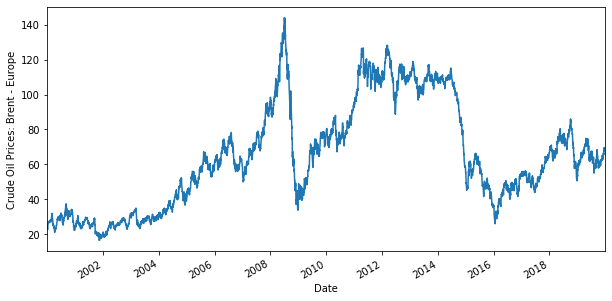

In [4]:
plt.ylabel("Crude Oil Prices: Brent - Europe")
data.Value.plot(figsize=(10,5))

In [5]:
#To predict price of oil we will be using moving averages for the past three and nine days
data['MA3'] = data['Value'].shift(1).rolling(window=3).mean()
data['MA9']= data['Value'].shift(1).rolling(window=9).mean()


In [6]:
data.head(10)

,Value,MA3,MA9
Date,,,
2000-01-04,23.95,NaN,NaN
2000-01-05,23.72,NaN,NaN
2000-01-06,23.55,NaN,NaN
2000-01-07,23.35,23.740000,NaN
2000-01-10,22.77,23.540000,NaN
2000-01-11,23.93,23.223333,NaN
2000-01-12,24.62,23.350000,NaN
2000-01-13,24.90,23.773333,NaN
2000-01-14,25.50,24.483333,NaN


In [7]:
data = data.dropna()
X = data[['MA3','MA9']]
y = data['Value']


In [8]:
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [9]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)

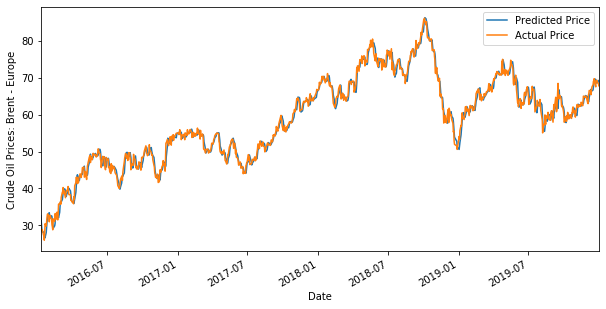

In [11]:
predicted_price_ = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price_,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()

In [12]:
from sklearn.metrics import r2_score
R_squared_score = r2_score(y_test,predicted_price_)*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 98.60% accuracy.


- We can make the dataset larger to get better accuracy
- For eg. if we use data from 1987-05-20 onwards we will get an accuracy way better 
- We can also tweak the explanatory variables, try using moving averages of the past 1 and 2 days 
- We can add more variables to X to improve accuracy like technical indicators, world economic data, supplementary industries etc.